# Data Collection & Analysis

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('EOD-AAPL.csv',)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1090 non-null   object 
 1   Open        1090 non-null   float64
 2   High        1090 non-null   float64
 3   Low         1090 non-null   float64
 4   Close       1090 non-null   float64
 5   Volume      1090 non-null   float64
 6   Dividend    1090 non-null   float64
 7   Split       1090 non-null   float64
 8   Adj_Open    1090 non-null   float64
 9   Adj_High    1090 non-null   float64
 10  Adj_Low     1090 non-null   float64
 11  Adj_Close   1090 non-null   float64
 12  Adj_Volume  1090 non-null   float64
dtypes: float64(12), object(1)
memory usage: 110.8+ KB


In [75]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1090 non-null   datetime64[ns]
 1   Open        1090 non-null   float64       
 2   High        1090 non-null   float64       
 3   Low         1090 non-null   float64       
 4   Close       1090 non-null   float64       
 5   Volume      1090 non-null   float64       
 6   Dividend    1090 non-null   float64       
 7   Split       1090 non-null   float64       
 8   Adj_Open    1090 non-null   float64       
 9   Adj_High    1090 non-null   float64       
 10  Adj_Low     1090 non-null   float64       
 11  Adj_Close   1090 non-null   float64       
 12  Adj_Volume  1090 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 110.8 KB


In [76]:
df.set_index('Date', inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2017-12-28 to 2013-09-03
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7 KB


,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0


In [77]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100
df['PCT_change']=(df['Adj_Close'] - df['Adj_Open'])/df['Adj_Open']*100

In [78]:
df = df.drop(['Open','High','Low','Close'], axis=1)

# Data Manipulation & Feature Engineering

In [79]:
df

,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,,,,
2017-12-28,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0,0.800795,0.046784
2017-12-27,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0,0.627198,0.293945
2017-12-26,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660
2017-12-22,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
2017-12-21,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287
...,...,...,...,...,...,...,...,...,...,...
2013-09-09,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
2013-09-06,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-05,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502


In [80]:
df1 = df.drop(['Volume','Dividend','Split','Adj_Open','Adj_High','Adj_Low'],axis=1)
#df = df[['Adj_Close','Adj_Volume','HL_PCT','PCT_Change']]

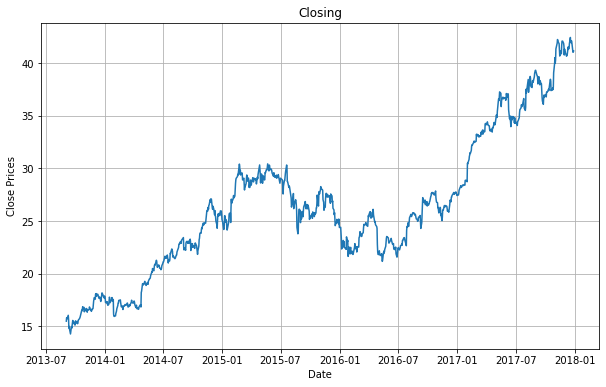

In [81]:
#plot closing price

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df1['Adj_Close'])

plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.title('Closing')
plt.show()

In [82]:
df1.corr()

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Close,1.000000,-0.553474,-0.137288,0.025237
Adj_Volume,-0.553474,1.000000,0.512480,-0.079556
HL_PCT,-0.137288,0.512480,1.000000,-0.060349
PCT_change,0.025237,-0.079556,-0.060349,1.000000


In [85]:
df1

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,
2017-12-28,41.156217,65920748.0,0.800795,0.046784
2017-12-27,41.040745,85992852.0,0.627198,0.293945
2017-12-26,41.033528,132742144.0,1.050009,-0.134660
2017-12-22,42.101646,65397776.0,0.527970,0.188917
2017-12-21,42.101646,83799584.0,1.097080,0.482287
...,...,...,...,...
2013-09-09,16.033661,340687200.0,0.877176,0.231683
2013-09-06,15.781833,359525600.0,1.892738,-0.044138
2013-09-05,15.688388,236367600.0,1.421447,-0.995502


# Preparing Input Output Feaures For Model Training

In [101]:
label = df1['Adj_Close'].shift(-10)
#printing label having total nan value
label.isna().sum()

10

In [102]:
df1["Adj_Close"]

Date
2017-12-28    41.156217
2017-12-27    41.040745
2017-12-26    41.033528
2017-12-22    42.101646
2017-12-21    42.101646
                ...    
2013-09-09    16.033661
2013-09-06    15.781833
2013-09-05    15.688388
2013-09-04    15.796753
2013-09-03    15.476472
Name: Adj_Close, Length: 1090, dtype: float64

In [103]:
import numpy as np
label.dropna(inplace=True)
y = np.array(label)
y.shape

(1080,)

In [112]:
X= (df1[["Adj_Volume","HL_PCT","PCT_change"]])# collection of features as array
X.shape        

(1090, 3)

In [113]:
X_labely = X[-10:] #column creation for later prediction
X = X[:-10] # X will contain trainig and testing

print(X_labely.shape)

(10, 3)


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=41)
scale = MinMaxScaler().fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)
X_labely = scale.transform(X_labely)

In [116]:
result = LinearRegression()
result.fit(X_train,y_train)
score = result.score(X_test,y_test)

# Calculating MSE Value

In [118]:
from sklearn.metrics import mean_squared_error 
summation=[]
summation= result.predict(X_labely)
y_pred = result.predict(X_test)
MSE = mean_squared_error(y_test,y_pred)
print("MSE:",MSE)
print("Linear Regression",score)
print(summation)

MSE: 28.741766436731357
Linear Regression 0.27923951942266456
[14.35617251 21.79122028 17.16662614 -4.46938879  6.25867343 18.37339825
 19.35205786 24.3760392  18.87765497 22.2902693 ]
